## Assignment - House Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# reading the dataset
housing_df = pd.read_csv("train.csv")

In [4]:
# summary of the dataset: 1460 rows, 81 columns
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# head
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# dropping columns with high count of missing values
housing_df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], 
  axis='columns', inplace=True)

In [7]:
# summary of the dataset: 1460 rows, 76 columns
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [10]:
# MSSubClass - Checking values
housing_df['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [11]:
# MSZoning: Identifies the general zoning classification of the sale.

housing_df['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

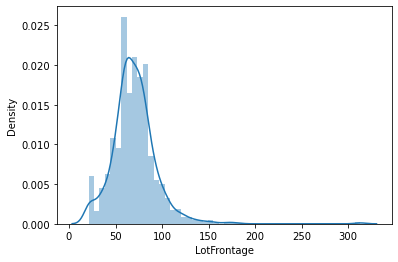

In [14]:
#LotFrontage: Linear feet of street connected to property
sns.distplot(housing_df['LotFrontage'])
plt.show()

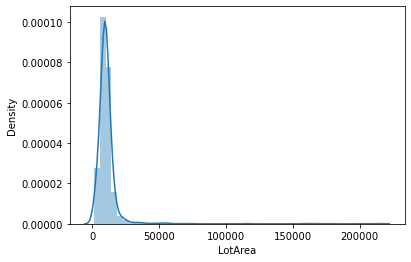

In [15]:
# LotArea: Lot size in square feet
sns.distplot(housing_df['LotArea'])
plt.show()

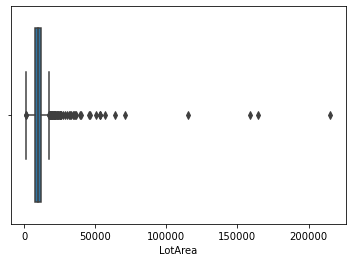

In [16]:
# finding outliers in LotArea
sns.boxplot(housing_df['LotArea'])
plt.show()

In [17]:
# removing entries where LotArea size is greater than 50000
housing_df = housing_df[housing_df['LotArea'] < 50000]

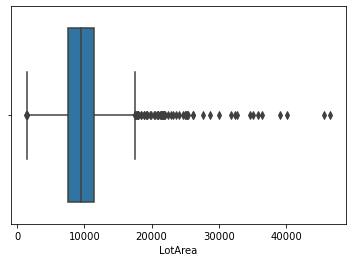

In [18]:
# Checking distribution of LotArea
sns.boxplot(housing_df['LotArea'])
plt.show()

In [19]:
# summary of the dataset: 1449 rows, 76 columns
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1449 non-null   int64  
 1   MSSubClass     1449 non-null   int64  
 2   MSZoning       1449 non-null   object 
 3   LotFrontage    1196 non-null   float64
 4   LotArea        1449 non-null   int64  
 5   Street         1449 non-null   object 
 6   LotShape       1449 non-null   object 
 7   LandContour    1449 non-null   object 
 8   Utilities      1449 non-null   object 
 9   LotConfig      1449 non-null   object 
 10  LandSlope      1449 non-null   object 
 11  Neighborhood   1449 non-null   object 
 12  Condition1     1449 non-null   object 
 13  Condition2     1449 non-null   object 
 14  BldgType       1449 non-null   object 
 15  HouseStyle     1449 non-null   object 
 16  OverallQual    1449 non-null   int64  
 17  OverallCond    1449 non-null   int64  
 18  YearBuil

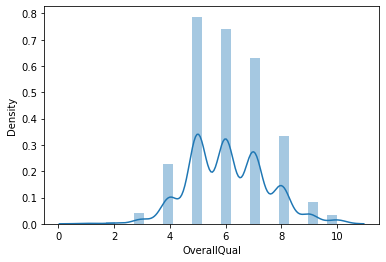

In [21]:
# OverallQual: Rates the overall material and finish of the house
sns.distplot(housing_df['OverallQual'])
plt.show()

In [25]:
housing_df['OverallQual'].value_counts()

5     395
6     372
7     316
8     167
4     115
9      42
3      20
10     17
2       3
1       2
Name: OverallQual, dtype: int64

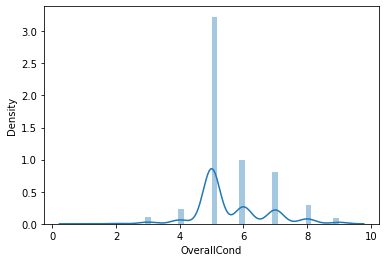

In [26]:
# OverallCond: Rates the overall condition of the house
sns.distplot(housing_df['OverallCond'])
plt.show()

In [28]:
# HeatingQC: Heating quality and condition
housing_df['HeatingQC'].value_counts()

Ex    736
TA    424
Gd    239
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [29]:
# KitchenQual: Kitchen quality
housing_df['KitchenQual'].value_counts()

TA    732
Gd    580
Ex     98
Fa     39
Name: KitchenQual, dtype: int64

In [35]:
housing_df['EnclosedPorch'].value_counts()

0      1242
112      15
96        6
120       5
144       5
       ... 
172       1
170       1
169       1
68        1
552       1
Name: EnclosedPorch, Length: 119, dtype: int64

In [36]:
housing_df['3SsnPorch'].value_counts()

0      1425
168       3
216       2
144       2
180       2
407       1
320       1
304       1
290       1
245       1
238       1
182       1
196       1
23        1
162       1
153       1
140       1
130       1
96        1
508       1
Name: 3SsnPorch, dtype: int64

In [37]:
housing_df['ScreenPorch'].value_counts()

0      1334
192       6
120       5
224       5
189       4
       ... 
182       1
95        1
63        1
190       1
480       1
Name: ScreenPorch, Length: 75, dtype: int64

In [38]:
housing_df['PoolArea'].value_counts()

0      1443
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

In [39]:
housing_df['MiscVal'].value_counts()

0        1399
400        11
500         7
450         4
700         4
600         4
2000        4
480         2
1200        2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
1150        1
15500       1
1300        1
1400        1
3500        1
Name: MiscVal, dtype: int64

In [40]:
# Droping columns with majority zero values
housing_df.drop(['MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch'], 
  axis='columns', inplace=True)

In [41]:
# summary of the dataset: 1449 rows, 71 columns
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1449 non-null   int64  
 1   MSSubClass     1449 non-null   int64  
 2   MSZoning       1449 non-null   object 
 3   LotFrontage    1196 non-null   float64
 4   LotArea        1449 non-null   int64  
 5   Street         1449 non-null   object 
 6   LotShape       1449 non-null   object 
 7   LandContour    1449 non-null   object 
 8   Utilities      1449 non-null   object 
 9   LotConfig      1449 non-null   object 
 10  LandSlope      1449 non-null   object 
 11  Neighborhood   1449 non-null   object 
 12  Condition1     1449 non-null   object 
 13  Condition2     1449 non-null   object 
 14  BldgType       1449 non-null   object 
 15  HouseStyle     1449 non-null   object 
 16  OverallQual    1449 non-null   int64  
 17  OverallCond    1449 non-null   int64  
 18  YearBuil

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [42]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,8,0,2003.0,2,548,0,61,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,6,1,1976.0,2,460,298,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,6,1,2001.0,2,608,0,42,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,7,1,1998.0,3,642,0,35,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,9,1,2000.0,3,836,192,84,12,2008,250000


In [81]:
housing_numeric.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1449.000000,1449.000000,1196.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1441.000000,1449.000000,...,1449.000000,1449.000000,1368.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000
mean,731.613527,56.956522,69.807692,9867.879917,6.094548,5.576950,1971.242926,1984.856453,102.934768,435.703244,...,6.510007,0.603175,1978.524854,1.763975,471.394065,92.707384,46.346446,6.320911,2007.815735,180084.883368
std,421.524133,42.249246,23.171396,4578.300353,1.379118,1.115458,30.271932,20.659502,179.833047,432.471596,...,1.615298,0.635519,24.740573,0.748516,212.486997,122.337201,65.920763,2.701516,1.328034,78636.782820
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,367.000000,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,5.000000,0.000000,1961.000000,1.000000,327.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,733.000000,50.000000,69.500000,9450.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,379.000000,...,6.000000,1.000000,1980.000000,2.000000,478.000000,0.000000,24.000000,6.000000,2008.000000,162900.000000
75%,1096.000000,70.000000,80.000000,11500.000000,7.000000,6.000000,2000.000000,2004.000000,165.000000,705.000000,...,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,213000.000000
max,1460.000000,190.000000,313.000000,46589.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,14.000000,3.000000,2010.000000,4.000000,1390.000000,736.000000,547.000000,12.000000,2010.000000,755000.000000


In [43]:
# correlation matrix
cor = housing_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
Id,1.000000,0.011697,-0.020458,0.008519,-0.028703,0.013701,-0.013214,-0.021561,-0.054775,-0.008296,...,0.024203,-0.017510,-0.002158,0.018900,0.015784,-0.020520,-0.000809,0.025811,-0.003548,-0.014639
MSSubClass,0.011697,1.000000,-0.404457,-0.312661,0.035581,-0.061630,0.027615,0.041944,0.023580,-0.073850,...,0.038800,-0.044497,0.085204,-0.039218,-0.098291,-0.018179,-0.004589,-0.013613,-0.022433,-0.082172
LotFrontage,-0.020458,-0.404457,1.000000,0.579902,0.241374,-0.056835,0.120755,0.087322,0.175570,0.153439,...,0.343842,0.243533,0.065848,0.298673,0.329405,0.091658,0.129707,0.030185,0.004826,0.373854
LotArea,0.008519,-0.312661,0.579902,1.000000,0.187884,-0.005766,0.037304,0.042086,0.165552,0.200755,...,0.347127,0.299894,-0.009225,0.278256,0.305684,0.196795,0.153006,-0.006943,-0.038330,0.378505
OverallQual,-0.028703,0.035581,0.241374,0.187884,1.000000,-0.089356,0.572053,0.552223,0.408364,0.225895,...,0.426615,0.399781,0.547710,0.601659,0.557964,0.235344,0.307035,0.071186,-0.025926,0.798728
OverallCond,0.013701,-0.061630,-0.056835,-0.005766,-0.089356,1.000000,-0.375625,0.073362,-0.129312,-0.042352,...,-0.056100,-0.021680,-0.323689,-0.185017,-0.149227,0.000454,-0.031835,-0.002815,0.044776,-0.076040
YearBuilt,-0.013214,0.027615,0.120755,0.037304,0.572053,-0.375625,1.000000,0.593188,0.314658,0.252692,...,0.091244,0.148999,0.825273,0.538310,0.479252,0.226793,0.186425,0.013191,-0.013402,0.527997
YearRemodAdd,-0.021561,0.041944,0.087322,0.042086,0.552223,0.073362,0.593188,1.000000,0.173876,0.125664,...,0.190558,0.113850,0.643567,0.421802,0.372307,0.209643,0.222835,0.024571,0.038025,0.513034
MasVnrArea,-0.054775,0.023580,0.175570,0.165552,0.408364,-0.129312,0.314658,0.173876,1.000000,0.248207,...,0.271733,0.245364,0.251237,0.365544,0.366480,0.160727,0.118376,0.000874,-0.010616,0.481502
BsmtFinSF1,-0.008296,-0.073850,0.153439,0.200755,0.225895,-0.042352,0.252692,0.125664,0.248207,1.000000,...,0.014767,0.232722,0.153664,0.226927,0.270987,0.185219,0.085221,-0.003722,0.015320,0.395687


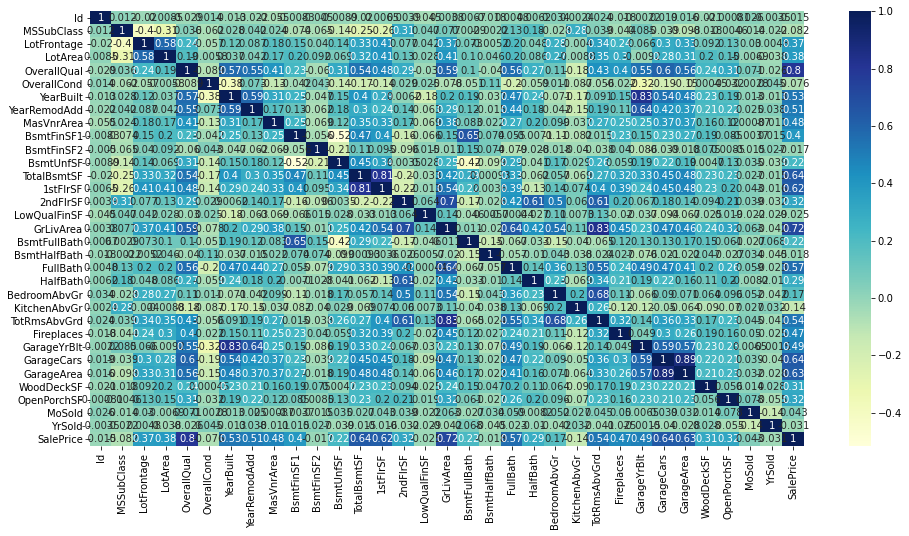

In [44]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of Sale price with independent variables:
- Price is highly (positively) correlated with OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF.

- Target variable is not highly negatively correlated with any data.

Correlation among independent variables:
- Many independent variables are highly correlated and many are highly negatively correlated.


Thus, while building the model, we'll have to pay attention to multicollinearity. 

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've below column list with minimul missing values. Lets fill the median values where we can.


In [46]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1449 non-null   int64  
 1   MSSubClass     1449 non-null   int64  
 2   MSZoning       1449 non-null   object 
 3   LotFrontage    1196 non-null   float64
 4   LotArea        1449 non-null   int64  
 5   Street         1449 non-null   object 
 6   LotShape       1449 non-null   object 
 7   LandContour    1449 non-null   object 
 8   Utilities      1449 non-null   object 
 9   LotConfig      1449 non-null   object 
 10  LandSlope      1449 non-null   object 
 11  Neighborhood   1449 non-null   object 
 12  Condition1     1449 non-null   object 
 13  Condition2     1449 non-null   object 
 14  BldgType       1449 non-null   object 
 15  HouseStyle     1449 non-null   object 
 16  OverallQual    1449 non-null   int64  
 17  OverallCond    1449 non-null   int64  
 18  YearBuil

In [47]:
housing_df['LotFrontage'].value_counts() # This column have almost 20% missing values, better to drop this column

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
140.0      1
160.0      1
141.0      1
111.0      1
168.0      1
Name: LotFrontage, Length: 109, dtype: int64

In [49]:
# Droping columns with majority zero values
housing_df.drop('LotFrontage',
  axis='columns', inplace=True)

In [52]:
print('MasVnrType value Counts \n', housing_df['MasVnrType'].value_counts())
print('MasVnrArea value Counts \n', housing_df['MasVnrArea'].value_counts())
print('BsmtQual value Counts \n', housing_df['BsmtQual'].value_counts())
print('BsmtCond value Counts \n', housing_df['BsmtCond'].value_counts())
print('BsmtExposure value Counts \n', housing_df['BsmtExposure'].value_counts())
print('BsmtFinType1 value Counts \n', housing_df['BsmtFinType1'].value_counts())
print('BsmtFinType2 value Counts \n', housing_df['BsmtFinType2'].value_counts())
print('Electrical value Counts \n', housing_df['Electrical'].value_counts())
print('GarageType value Counts \n', housing_df['GarageType'].value_counts())
print('GarageYrBlt value Counts \n', housing_df['GarageYrBlt'].value_counts())
print('GarageFinish value Counts \n', housing_df['GarageFinish'].value_counts())
print('GarageQual value Counts \n', housing_df['GarageQual'].value_counts())
print('GarageCond value Counts \n', housing_df['GarageCond'].value_counts())


MasVnrType value Counts 
 None       857
BrkFace    444
Stone      126
BrkCmn      14
Name: MasVnrType, dtype: int64
MasVnrArea value Counts 
 0.0      854
72.0       8
108.0      8
180.0      8
16.0       7
        ... 
481.0      1
375.0      1
342.0      1
137.0      1
415.0      1
Name: MasVnrArea, Length: 325, dtype: int64
BsmtQual value Counts 
 TA    647
Gd    611
Ex    119
Fa     35
Name: BsmtQual, dtype: int64
BsmtCond value Counts 
 TA    1300
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
BsmtExposure value Counts 
 No    953
Av    219
Gd    125
Mn    114
Name: BsmtExposure, dtype: int64
BsmtFinType1 value Counts 
 Unf    430
GLQ    414
ALQ    216
BLQ    146
Rec    132
LwQ     74
Name: BsmtFinType1, dtype: int64
BsmtFinType2 value Counts 
 Unf    1248
Rec      52
LwQ      46
BLQ      32
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Electrical value Counts 
 SBrkr    1323
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype

In [61]:
# filling these values with mode values
# housing_df['MasVnrType'].isnull().value_counts()
housing_df['MasVnrType'][housing_df['MasVnrType'].isnull()] = housing_df['MasVnrType'].mode() 
housing_df['MasVnrArea'][housing_df['MasVnrArea'].isnull()] = housing_df['MasVnrArea'].mode() 
housing_df['BsmtQual'][housing_df['BsmtQual'].isnull()] = housing_df['BsmtQual'].mode() 
housing_df['BsmtCond'][housing_df['BsmtCond'].isnull()] = housing_df['BsmtCond'].mode() 
housing_df['BsmtExposure'][housing_df['BsmtExposure'].isnull()] = housing_df['BsmtExposure'].mode() 
housing_df['BsmtFinType1'][housing_df['BsmtFinType1'].isnull()] = housing_df['BsmtFinType1'].mode() 
housing_df['BsmtFinType2'][housing_df['BsmtFinType2'].isnull()] = housing_df['BsmtFinType2'].mode() 
housing_df['Electrical'][housing_df['Electrical'].isnull()] = housing_df['Electrical'].mode() 
housing_df['GarageType'][housing_df['GarageType'].isnull()] = housing_df['GarageType'].mode() 
housing_df['GarageYrBlt'][housing_df['GarageYrBlt'].isnull()] = housing_df['GarageYrBlt'].mode() 
housing_df['GarageFinish'][housing_df['GarageFinish'].isnull()] = housing_df['GarageFinish'].mode() 
housing_df['GarageQual'][housing_df['GarageQual'].isnull()] = housing_df['GarageQual'].mode() 
housing_df['GarageCond'][housing_df['GarageCond'].isnull()] = housing_df['GarageCond'].mode() 


In [62]:
# final housing dataset with no null values
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1449 non-null   int64  
 1   MSSubClass     1449 non-null   int64  
 2   MSZoning       1449 non-null   object 
 3   LotArea        1449 non-null   int64  
 4   Street         1449 non-null   object 
 5   LotShape       1449 non-null   object 
 6   LandContour    1449 non-null   object 
 7   Utilities      1449 non-null   object 
 8   LotConfig      1449 non-null   object 
 9   LandSlope      1449 non-null   object 
 10  Neighborhood   1449 non-null   object 
 11  Condition1     1449 non-null   object 
 12  Condition2     1449 non-null   object 
 13  BldgType       1449 non-null   object 
 14  HouseStyle     1449 non-null   object 
 15  OverallQual    1449 non-null   int64  
 16  OverallCond    1449 non-null   int64  
 17  YearBuilt      1449 non-null   int64  
 18  YearRemo

In [63]:
# outliers
housing_df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1441.000000,1449.000000,1449.000000,...,1449.000000,1449.000000,1368.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000
mean,731.613527,56.956522,9867.879917,6.094548,5.576950,1971.242926,1984.856453,102.934768,435.703244,46.004831,...,6.510007,0.603175,1978.524854,1.763975,471.394065,92.707384,46.346446,6.320911,2007.815735,180084.883368
std,421.524133,42.249246,4578.300353,1.379118,1.115458,30.271932,20.659502,179.833047,432.471596,160.412480,...,1.615298,0.635519,24.740573,0.748516,212.486997,122.337201,65.920763,2.701516,1.328034,78636.782820
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,367.000000,20.000000,7500.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,5.000000,0.000000,1961.000000,1.000000,327.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,733.000000,50.000000,9450.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,379.000000,0.000000,...,6.000000,1.000000,1980.000000,2.000000,478.000000,0.000000,24.000000,6.000000,2008.000000,162900.000000
75%,1096.000000,70.000000,11500.000000,7.000000,6.000000,2000.000000,2004.000000,165.000000,705.000000,0.000000,...,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,213000.000000
max,1460.000000,190.000000,46589.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,...,14.000000,3.000000,2010.000000,4.000000,1390.000000,736.000000,547.000000,12.000000,2010.000000,755000.000000


In [64]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1449 non-null   int64  
 1   MSSubClass     1449 non-null   int64  
 2   MSZoning       1449 non-null   object 
 3   LotArea        1449 non-null   int64  
 4   Street         1449 non-null   object 
 5   LotShape       1449 non-null   object 
 6   LandContour    1449 non-null   object 
 7   Utilities      1449 non-null   object 
 8   LotConfig      1449 non-null   object 
 9   LandSlope      1449 non-null   object 
 10  Neighborhood   1449 non-null   object 
 11  Condition1     1449 non-null   object 
 12  Condition2     1449 non-null   object 
 13  BldgType       1449 non-null   object 
 14  HouseStyle     1449 non-null   object 
 15  OverallQual    1449 non-null   int64  
 16  OverallCond    1449 non-null   int64  
 17  YearBuilt      1449 non-null   int64  
 18  YearRemo

In [84]:
housing_float = housing_df.select_dtypes(include='float64')
housing_float.describe()

,MasVnrArea,GarageYrBlt
count,1441.000000,1368.000000
mean,102.934768,1978.524854
std,179.833047,24.740573
min,0.000000,1900.000000
25%,0.000000,1961.000000
50%,0.000000,1980.000000
75%,165.000000,2002.000000
max,1600.000000,2010.000000


In [85]:
# Dropping column MasVnrArea as most values look zero
housing_df.drop('MasVnrArea',
  axis='columns', inplace=True)

In [178]:
print(housing_df.shape)
housing_df.dropna()
print(housing_df.shape)

(1449, 69)
(1449, 69)


## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [179]:
# split into X and y
X = housing_df.loc[:, ['MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1',
        'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF','2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional','Fireplaces', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea','GarageQual', 'GarageCond',
        'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold','YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']] # predictors in variable X

#y = housing_df['SalePrice'] # response variable in Y
 

In [180]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [181]:
# convert into dummies - one hot encoding
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [182]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [183]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [184]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=225)

In [155]:
# concating with y before data processing
# X = pd.concat([X, y], axis=1)

In [185]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(X)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.072061,-0.309803,0.656771,-0.517410,1.049422,0.878521,0.625220,-0.286890,-0.947005,-0.466879,...,-0.058844,-0.058844,-0.301852,-0.045549,0.390826,-0.052613,-0.091382,-0.118304,0.468718,-0.305917
1,-0.875028,-0.058531,-0.068581,2.172996,0.157199,-0.428835,1.254381,-0.286890,-0.644056,0.507256,...,-0.058844,-0.058844,-0.301852,-0.045549,0.390826,-0.052613,-0.091382,-0.118304,0.468718,-0.305917
2,0.072061,0.301989,0.656771,-0.517410,0.983332,0.830101,0.116341,-0.286890,-0.304934,-0.313321,...,-0.058844,-0.058844,-0.301852,-0.045549,0.390826,-0.052613,-0.091382,-0.118304,0.468718,-0.305917
3,0.308833,-0.069456,0.656771,-0.517410,-1.858565,-0.719358,-0.508193,-0.286890,-0.065287,-0.706814,...,-0.058844,-0.058844,-0.301852,-0.045549,0.390826,-0.052613,-0.091382,-0.118304,-2.133477,-0.305917
4,0.072061,0.959665,1.382123,-0.517410,0.950286,0.733259,0.507253,-0.286890,-0.178328,0.226532,...,-0.058844,-0.058844,-0.301852,-0.045549,0.390826,-0.052613,-0.091382,-0.118304,0.468718,-0.305917
5,-0.164711,0.927983,-0.793932,-0.517410,0.718969,0.491157,0.685361,-0.286890,-1.141435,-0.610840,...,-0.058844,-0.058844,-0.301852,-0.045549,0.390826,-0.052613,-0.091382,-0.118304,0.468718,-0.305917
6,-0.875028,0.047222,1.382123,-0.517410,1.082468,0.975362,2.158798,-0.286890,-0.569449,1.524579,...,-0.058844,-0.058844,-0.301852,-0.045549,0.390826,-0.052613,-0.091382,-0.118304,0.468718,-0.305917
7,0.072061,0.112334,0.656771,0.379392,0.058063,-0.574096,0.979123,-0.087335,-0.797791,0.135357,...,-0.058844,-0.058844,-0.301852,-0.045549,0.390826,-0.052613,-0.091382,-0.118304,0.468718,-0.305917
8,-0.164711,-0.818901,0.656771,-0.517410,-1.329840,-1.687770,-1.007820,-0.286890,0.866168,-0.236542,...,-0.058844,-0.058844,-0.301852,-0.045549,0.390826,-0.052613,-0.091382,-0.118304,-2.133477,-0.305917
9,3.150101,-0.534855,-0.793932,0.379392,-1.065477,-1.687770,0.960618,-0.286890,-0.969613,-0.142967,...,-0.058844,-0.058844,-0.301852,-0.045549,0.390826,-0.052613,-0.091382,-0.118304,0.468718,-0.305917


In [186]:
# getting y from scaled version, as it is not being indexed correctly after dropping the negative infinites
y = X['SalePrice']
y.head()

0    0.361471
1    0.018002
2    0.552287
3   -0.509923
4    0.889396
Name: SalePrice, dtype: float64

In [187]:
X.drop('SalePrice',
  axis='columns', inplace=True)

In [188]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [189]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [161]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

22592249327582.547
[ 3.88290240e+04  1.31070978e+03 -3.40476527e+03 -3.97650021e+03
 -1.01892226e+04  9.71806539e+03  1.76541566e+13  6.54828448e+12
  1.80623556e+13 -1.70194742e+13 -9.29989892e+14 -1.08328504e+15
 -1.21326275e+14  1.27601243e+15  4.93305688e+03 -3.96930664e+03
  3.88572070e+03 -4.26475153e+03 -3.69512305e+03 -7.50336377e+03
  2.60089502e+03  4.84578613e+03 -8.58096811e+03  2.39034229e+03
 -3.16788086e+02  5.49079993e+03 -2.12362280e+03 -6.04406494e+02
  1.62344971e+03 -1.84423579e+04 -6.81811096e+03 -3.24830024e+04
 -3.11299548e+04 -6.74558594e+02  1.14854834e+03  9.57236206e+02
  4.41667676e+03 -3.76389069e+03 -2.89207690e+03 -1.05420544e+03
 -6.33170176e+11  2.61562012e+02  7.64733551e+03  7.76621179e+03
  5.91273669e+03  1.82716431e+03  4.25691272e+03  5.20482166e+03
  8.05294482e+03  4.80073236e+03 -5.80453510e+03  9.35222827e+03
  6.46669702e+03  1.16766741e+04  5.69169775e+03  7.13060547e+02
  4.14159570e+03  1.01977368e+04  1.49922378e+04  2.55624072e+03
  3.75

In [190]:
from sklearn.metrics import r2_score, mean_squared_error

In [191]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9442157251822046
-1.3723610836534475e+20
54.198480040790116
5.208332819466609e+22
0.05663373045014641
1.2672342626439438e+20


## Ridge and Lasso Regression

Let's now try predicting House prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [192]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [193]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [194]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.09068008e-02  8.55628592e-02  1.39283458e-01  9.40637108e-02
  1.52073868e-01  1.11688129e-02  1.08552216e-01  1.96217789e-02
  7.92429184e-03  1.28559682e-01  8.99673696e-02  1.96353509e-01
 -5.53085793e-03  2.31741100e-01 -4.84024557e-03 -1.22294651e-02
  2.87498089e-02  5.34353448e-03 -6.52500322e-02 -4.27400544e-02
  1.63345664e-02  8.55191601e-04 -1.00312762e-03  5.90654506e-02
  1.60994766e-02  1.65763846e-02  7.58644373e-03 -1.39264213e-02
 -4.02046905e-03  5.76497287e-02 -1.34960820e-02  5.26008032e-02
  3.18601506e-02  2.63383458e-02 -1.23291036e-02 -1.14183595e-02
 -3.31766813e-03 -1.30085689e-02 -3.07939826e-02 -9.14250827e-03
 -7.70132903e-03  2.45758125e-02 -1.42570260e-02 -9.90163308e-04
  1.19340239e-02  1.42225461e-03 -3.30701012e-02  1.71312663e-03
  9.84311397e-03  1.22672893e-02 -1.47983470e-02 -5.73453878e-03
  4.61632516e-02 -5.21519466e-02 -1.76520604e-02  1.23150240e-04
 -3.72327932e-03 -4.05461940e-02 -5.25464678e-02  1.07716568e-02
 -2.65809356e-02  6.10419

In [195]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9435349337031411
0.7894770933805015
54.85991847501701
79.89685636354892
0.05732488868862801
0.19439624419354967


## Lasso

In [196]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [197]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [202]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [203]:
lasso.coef_

array([-0.02928673,  0.05993869,  0.18929456,  0.0836993 ,  0.14402718,
        0.02432446,  0.09165774,  0.        , -0.        ,  0.11713226,
        0.        ,  0.00339319, -0.01438791,  0.40382551,  0.        ,
       -0.00730672,  0.        ,  0.        , -0.03369898, -0.05455965,
        0.        ,  0.00118847,  0.        ,  0.03743868,  0.03487923,
        0.00502992,  0.00263015, -0.0055272 ,  0.        ,  0.0059855 ,
       -0.        ,  0.        , -0.00400053,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.00449532,  0.        ,
       -0.        ,  0.01303703, -0.00365135, -0.        ,  0.        ,
        0.        , -0.00169666,  0.        ,  0.        ,  0.01227942,
        0.        ,  0.        ,  0.04172895, -0.0063344 , -0.        ,
        0.        , -0.        , -0.01702211, -0.01010062,  0.        ,
       -0.00332963,  0.06452892,  0.05063141, -0.00449587, -0.        ,
        0.        ,  0.        ,  0.00549224,  0.0392236 , -0.00

In [204]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9275441975657107
0.8137521729528767
70.39608160007016
70.68407008317865
0.07355912392901794
0.1719807057984882


In [205]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.442157e-01,0.943535,0.927544
1,R2 Score (Test),-1.372361e+20,0.789477,0.813752
2,RSS (Train),5.419848e+01,54.859918,70.396082
3,RSS (Test),5.208333e+22,79.896856,70.684070
4,MSE (Train),2.379784e-01,0.239426,0.271218
5,MSE (Test),1.125715e+10,0.440904,0.414706


## Lets observe the changes in the coefficients after regularization

In [206]:
betas = pd.DataFrame(index=X.columns)

In [207]:
betas.rows = X.columns

In [208]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [209]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,1.305529e-02,-0.010907,-0.029287
LotArea,9.038535e-02,0.085563,0.059939
OverallQual,1.342811e-01,0.139283,0.189295
OverallCond,1.002349e-01,0.094064,0.083699
YearBuilt,1.660707e-01,0.152074,0.144027
YearRemodAdd,6.558268e-03,0.011169,0.024324
BsmtFinSF1,-8.181970e+10,0.108552,0.091658
BsmtFinSF2,-3.034858e+10,0.019622,0.000000
BsmtUnfSF,-8.371153e+10,0.007924,-0.000000
TotalBsmtSF,7.887821e+10,0.128560,0.117132
